In [16]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [18]:
MODEL = "coronary"

paths = [
    "lc1",
]

CASES = [
    "sim_cor_inflow"
]

# meshes = [
#     "coarse",
#     "medium",
#     "fine",
#     "fine_2",
#     "fine_3"
# ]

# CASES = [
#     "sim_cor_inflow"
# ]

# paths = [
#     "lc1_sub1"
# ]

meshes = [
    "coarse",
    "medium",
    "fine"
]

quants   = [
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

generation = "converge"

models   = list(range(1))
dt       = 0.004

tups = []

for case in CASES:
    for p in paths:
            for m in meshes:
                    CSV    = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+case+"/converge"+'/'+p+".csv"
                    
                    OUTPUT = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+case+"/"+str(generation)+"/"+m
                    io.mkdir(OUTPUT)
                    OUTPUT = OUTPUT+'/'+p
                    io.mkdir(OUTPUT)
                    print(CSV)
                    df = pd.read_csv(CSV)
                    
                    points = df['point'].unique()
                    point_start = points[-2]
                    point_end = points[-2]
                    
                    df = df.loc[df['point'] >= point_start]
                    df = df.loc[df['point'] <= point_end]
                    df = df.loc[df['mesh']==m]
                    
                    df = df.groupby(['time',"model"]).median()
                    
                    tups.append( (case,p,m,df,OUTPUT) )
                    
DATA = [t[3] for t in tups]

/media/marsdenlab/Data1/UQ/coronary/sim_cor_inflow/converge/lc1.csv
/media/marsdenlab/Data1/UQ/coronary/sim_cor_inflow/converge/lc1.csv
/media/marsdenlab/Data1/UQ/coronary/sim_cor_inflow/converge/lc1.csv


In [19]:
print(df.iloc[:5])

            Unnamed: 0      area    length        nx        ny        nz  \
time model                                                                 
3000 0            5084  0.036388  0.685675 -0.091359  0.864599 -0.456522   
3025 0            5085  0.036388  0.685675 -0.091359  0.864599 -0.456522   
3050 0            5086  0.036388  0.685675 -0.091359  0.864599 -0.456522   
3075 0            5087  0.036388  0.685675 -0.091359  0.864599 -0.456522   
3100 0            5088  0.036388  0.685675 -0.091359  0.864599 -0.456522   

            point     pressure_0  pressure_0_boundary  radius_actual   ...     \
time model                                                             ...      
3000 0         40  159361.228936        159361.697710       0.107623   ...      
3025 0         40  157208.158666        157208.476013       0.107623   ...      
3050 0         40  128581.490232        128581.499553       0.107623   ...      
3075 0         40  122268.240761        122268.086763       0.

In [20]:
df_group = df.groupby('model').get_group(0)
df_group.iloc[:5]

,,Unnamed: 0,area,length,nx,ny,nz,point,pressure_0,pressure_0_boundary,radius_actual,...,velocity_0_boundary,velocity_1,velocity_1_boundary,velocity_2,velocity_2_boundary,velocity_3,velocity_3_boundary,x,y,z
time,model,,,,,,,,,,,,,,,,,,,,,
3000,0,5084,0.036388,0.685675,-0.091359,0.864599,-0.456522,40,159361.228936,159361.697710,0.107623,...,0.0,12.156424,0.0,-7.252855,0.0,14.183993,0.0,-14.242601,7.663424,-9.84773
3025,0,5085,0.036388,0.685675,-0.091359,0.864599,-0.456522,40,157208.158666,157208.476013,0.107623,...,0.0,11.107654,0.0,-6.613244,0.0,12.958072,0.0,-14.242601,7.663424,-9.84773
3050,0,5086,0.036388,0.685675,-0.091359,0.864599,-0.456522,40,128581.490232,128581.499553,0.107623,...,0.0,4.730949,0.0,-2.816000,0.0,5.516150,0.0,-14.242601,7.663424,-9.84773
3075,0,5087,0.036388,0.685675,-0.091359,0.864599,-0.456522,40,122268.240761,122268.086763,0.107623,...,0.0,4.390763,0.0,-2.642862,0.0,5.126655,0.0,-14.242601,7.663424,-9.84773
3100,0,5088,0.036388,0.685675,-0.091359,0.864599,-0.456522,40,132219.728782,132219.536043,0.107623,...,0.0,6.590998,0.0,-3.967980,0.0,7.695748,0.0,-14.242601,7.663424,-9.84773


In [21]:
d = tups[0][3]
print(d.shape)
print(len(tups))

(41, 30)
3


No handles with labels found to put in legend.


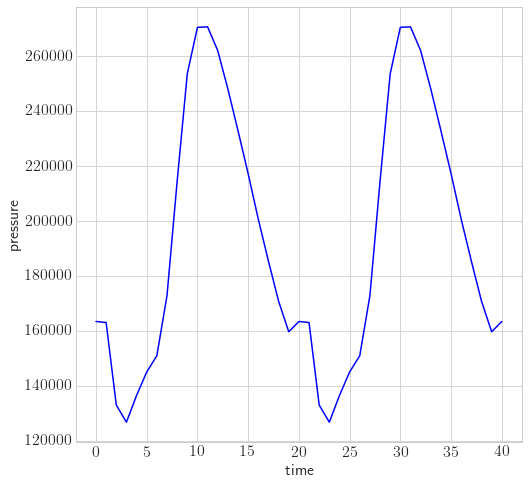

No handles with labels found to put in legend.


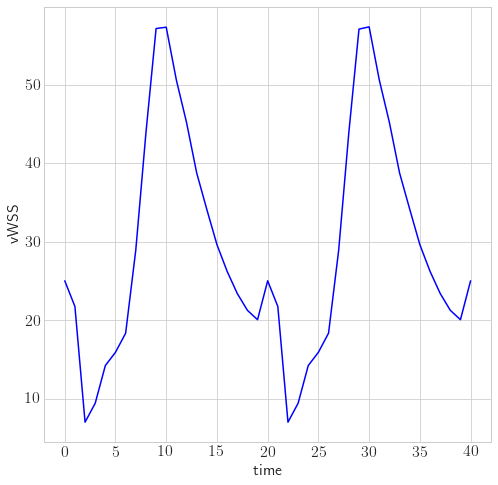

No handles with labels found to put in legend.


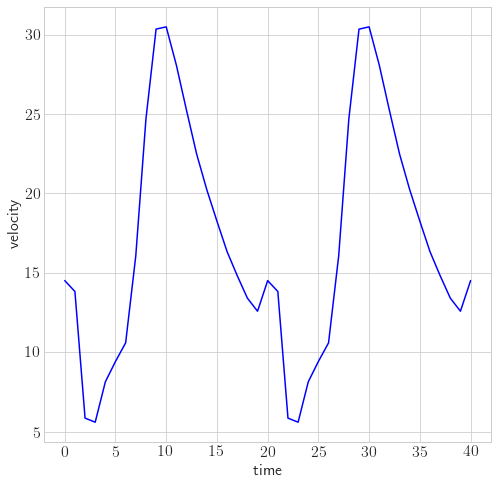

No handles with labels found to put in legend.


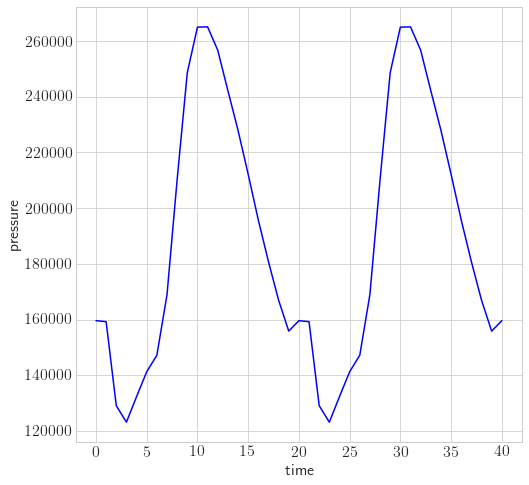

No handles with labels found to put in legend.


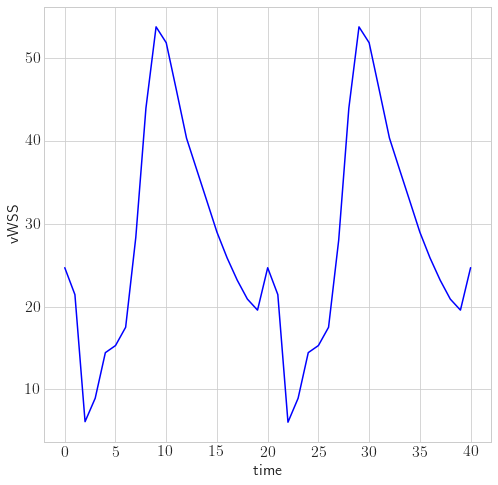

No handles with labels found to put in legend.


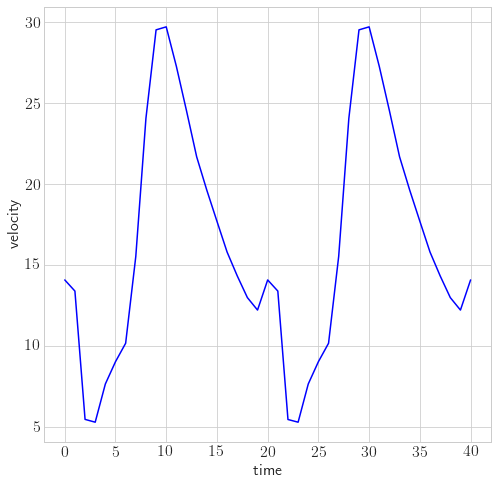

No handles with labels found to put in legend.


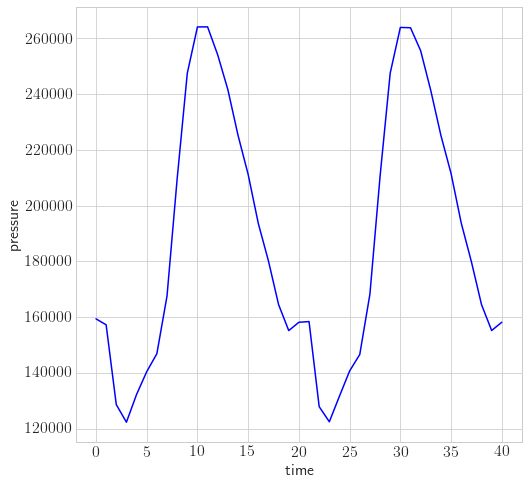

No handles with labels found to put in legend.


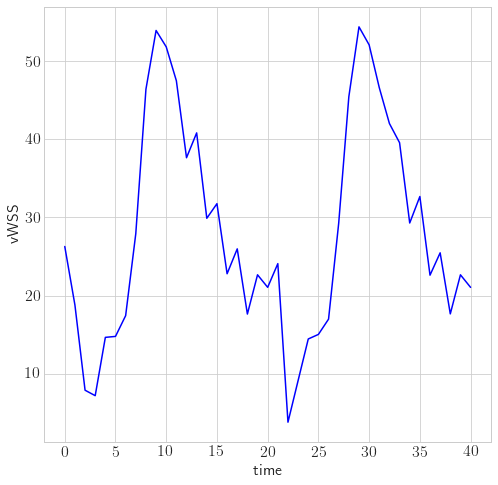

No handles with labels found to put in legend.


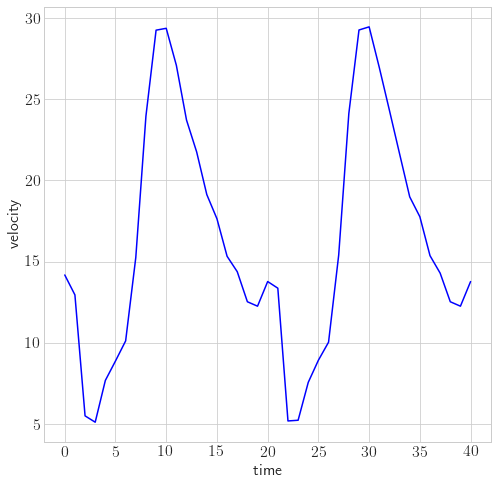

In [22]:
for t in tups:
    case,path,mesh,df,OUTPUT = t
    df_group = df.groupby('model')
    for q in quants:
        series_x = []
        series_y = []
        for m in models:
            data = df_group.get_group(m)

            if data.shape[0] == 0: continue

            y = data[q].values
            #x = data['time'].values*dt

            #series_x.append(x)
            series_y.append(y)

        Y = np.array(series_y)
        #X = np.array(series_x)
        
        label = q.split('_')[0]
        
        plt.figure(figsize=(8,8))
        plt.plot(Y.T, color='b')
        plt.xlabel("time")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'.pdf',dpi=200)
        
        plt.show()
        plt.close()

No handles with labels found to put in legend.


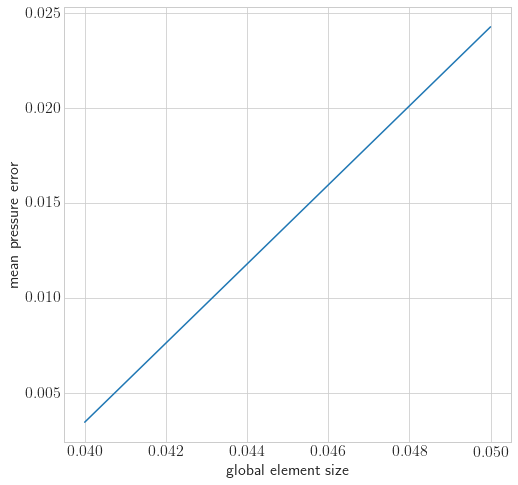

No handles with labels found to put in legend.


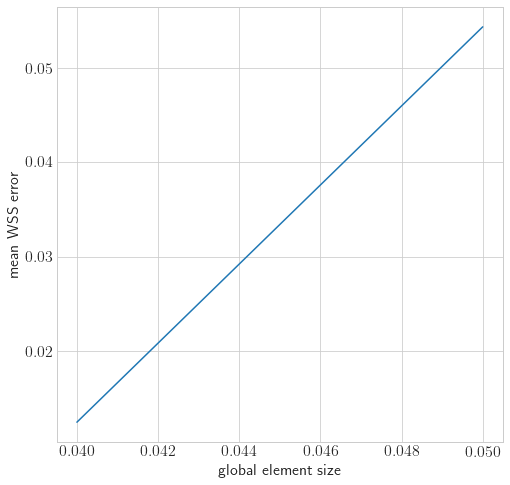

No handles with labels found to put in legend.


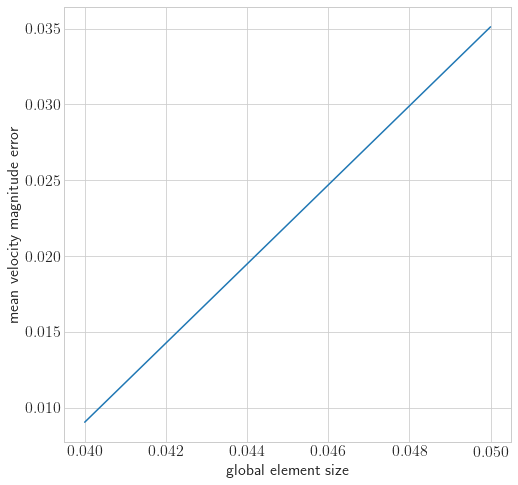

In [23]:
T = 100
#mesh_sizes = [0.3,0.15]
#mesh_sizes = [0.2,0.125]
mesh_sizes = [0.05,0.04]
FINE_MESH = 2
labels = ['mean pressure error',
          'mean WSS error',
          'mean velocity magnitude error']
for j,q in enumerate(quants):
        label = q.replace('_','')
        err = []
        y_fine = np.amax(DATA[FINE_MESH][q].values)
        
        for i,mesh in zip([0,1],['coarse','medium']):
            y_mesh = np.amax(DATA[i][q])

            err.append(np.mean(np.abs((y_fine-y_mesh)/(y_fine))))

        
        label = labels[j]
        plt.figure(figsize=(8,8))
        plt.plot(mesh_sizes, err)
        plt.xlabel("global element size")
        plt.ylabel(label)
        plt.legend()
        plt.savefig(OUTPUT+'/'+q+'_err_converge.png',dpi=300)
        plt.savefig(OUTPUT+'/'+q+'_err_converge.pdf',dpi=200)

        plt.show()
        plt.close()